In [206]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math
from matplotlib import pyplot as plt
from scipy import stats as stats

# visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler

# pipeline setup

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# cross validation
from sklearn.model_selection import KFold
# Import the evaluation matrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV


from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# evaluation on test data
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
# import library for Gradient Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [98]:
file_path = "\\Users\\eggfr\\Flatiron\\Flatiron_phase3_project\\data\\H1N1_Flu_Vaccines.csv"
project3_raw_df = pd.read_csv(file_path)


# Identifying Features and Target

Once the data is loaded into a pandas dataframe, the next step is identifying which columns represent features and which column represents the target.
In the cell below, assign X to be the features and y to be the target. Remember that X should not contain the target.

In [99]:
project3_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

# Identifying Features and Target

Once the data is loaded into a pandas dataframe, the next step is identifying which columns represent features and which column represents the target. In this project, we are going to focus on predicting whether people got H1N1 vaccine using data collected in the National 2009 H1N1 Flu Survey which can be found from this link https://www.kaggle.com/datasets/arashnic/flu-data.
In the cell below, assign X to be the features and y to be the target, which is project3_raw_2_df['h1n1_vaccine']. Also, this is not an extremely inbalanced dataset, around 78% of the responses is not vaccinated. Also, for binary variables in the dataset, 0 -> No, while 1 -> Yes.

In [100]:
print(project3_raw_df["h1n1_vaccine"].value_counts())
print()
print("Percentages")
print(project3_raw_df["h1n1_vaccine"].value_counts(normalize=True))

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

Percentages
0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64


In [101]:
y = project3_raw_df['h1n1_vaccine']
X = project3_raw_df.drop(columns=['h1n1_vaccine'], axis=1)

Separating data into training and testing sets is an important part of evaluating the models.Most of the data is used for training, and a smaller portion of the data is used for testing. For this analysis: we only split data into train and test. 75% of the data is for training and 25% for test. Also, the data split happened before we even do any EDA analysis to prevent data leakage. There is 20030 row of datas for the train set and 6677 rows of the data for test set before any data cleaning or analysis is done.

In [102]:
#create train-test set using 75%-25% ratio for the train set and test set and set the random state = 42) randomly split the data
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.25,random_state=42)
# shape of train and test splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20030, 37), (6677, 37), (20030,), (6677,))

In [103]:
x_train.isnull().sum().sort_values(ascending=False)

employment_occupation          10074
employment_industry             9974
health_insurance                9233
income_poverty                  3269
doctor_recc_h1n1                1635
doctor_recc_seasonal            1635
rent_or_own                     1512
employment_status               1081
education                       1040
marital_status                  1038
chronic_med_condition            717
child_under_6_months             605
health_worker                    597
opinion_seas_sick_from_vacc      407
opinion_seas_risk                387
opinion_seas_vacc_effective      349
opinion_h1n1_sick_from_vacc      301
opinion_h1n1_vacc_effective      299
opinion_h1n1_risk                292
household_children               188
household_adults                 188
behavioral_avoidance             157
behavioral_touch_face             98
h1n1_knowledge                    87
behavioral_large_gatherings       70
h1n1_concern                      67
behavioral_outside_home           58
b

In [104]:
#x_train['doctor_recc_h1n1'].value_counts()

In [105]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 25194 to 23654
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                20030 non-null  int64  
 1   h1n1_concern                 19963 non-null  float64
 2   h1n1_knowledge               19943 non-null  float64
 3   behavioral_antiviral_meds    19974 non-null  float64
 4   behavioral_avoidance         19873 non-null  float64
 5   behavioral_face_mask         20016 non-null  float64
 6   behavioral_wash_hands        19994 non-null  float64
 7   behavioral_large_gatherings  19960 non-null  float64
 8   behavioral_outside_home      19972 non-null  float64
 9   behavioral_touch_face        19932 non-null  float64
 10  doctor_recc_h1n1             18395 non-null  float64
 11  doctor_recc_seasonal         18395 non-null  float64
 12  chronic_med_condition        19313 non-null  float64
 13  child_under_

You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
behavioral_antiviral_meds - Has taken antiviral medications. (binary)
behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
behavioral_face_mask - Has bought a face mask. (binary)
behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
health_worker - Is a healthcare worker. (binary)
health_insurance - Has health insurance. (binary)
opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
age_group - Age group of respondent.
education - Self-reported education level.
race - Race of respondent.
sex - Sex of respondent.
income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
marital_status - Marital status of respondent.
rent_or_own - Housing situation of respondent.
employment_status - Employment status of respondent.
hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
household_adults - Number of other adults in household, top-coded to 3.
household_children - Number of children in household, top-coded to 3.
employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

There is no duplication for the train set and test set.

In [106]:
x_train.duplicated().sum()

0

In [107]:
x_test.duplicated().sum()

0

In [108]:
x_train['marital_status'].value_counts(normalize = True)

Married        0.538227
Not Married    0.461773
Name: marital_status, dtype: float64

In [109]:
x_train['income_poverty'].value_counts()

<= $75,000, Above Poverty    9671
> $75,000                    5095
Below Poverty                1995
Name: income_poverty, dtype: int64

In [110]:
x_train['education'].value_counts()

College Graduate    7564
Some College        5318
12 Years            4348
< 12 Years          1760
Name: education, dtype: int64

In [111]:
x_train['rent_or_own'].value_counts()

Own     14094
Rent     4424
Name: rent_or_own, dtype: int64

In [112]:
x_train['employment_status'].value_counts()

Employed              10193
Not in Labor Force     7671
Unemployed             1085
Name: employment_status, dtype: int64

In [113]:
x_train['education'].value_counts()

College Graduate    7564
Some College        5318
12 Years            4348
< 12 Years          1760
Name: education, dtype: int64

In [114]:
x_train['household_children'].value_counts()

0.0    13988
1.0     2393
2.0     2138
3.0     1323
Name: household_children, dtype: int64

In [115]:
x_train['hhs_geo_region'].value_counts()

lzgpxyit    3188
fpwskwrf    2446
qufhixun    2342
kbazzjca    2174
oxchjgsf    2170
bhuqouqj    2105
mlyzmhmf    1660
lrircsnp    1573
atmpeygn    1522
dqpwygqj     850
Name: hhs_geo_region, dtype: int64

In [116]:
x_train['census_msa'].value_counts()

MSA, Not Principle  City    8702
MSA, Principle City         5885
Non-MSA                     5443
Name: census_msa, dtype: int64

In [117]:
x_train['employment_industry'].value_counts(normalize = True)

fcxhlnwr    0.187848
wxleyezf    0.131961
ldnlellj    0.092979
pxcmvdjn    0.078361
atmlpfrs    0.071201
xicduogh    0.064439
arjwrbjb    0.063842
mfikgejo    0.045744
vjjrobsf    0.038982
rucpziij    0.038882
xqicxuve    0.037689
saaquncn    0.025358
cfqqtusy    0.023767
nduyfdeo    0.020784
mcubkhph    0.019889
wlfvacwt    0.015414
dotnnunm    0.013624
haxffmxo    0.011635
msuufmds    0.009348
phxvnwax    0.007160
qnlwzans    0.001094
Name: employment_industry, dtype: float64

In [118]:
x_train['health_insurance'].value_counts()

1.0    9514
0.0    1283
Name: health_insurance, dtype: int64

In [119]:
x_train['h1n1_concern'].value_counts()

2.0    7915
1.0    6149
3.0    3448
0.0    2451
Name: h1n1_concern, dtype: int64

In [120]:
print("age_group")
print(x_train.age_group.unique())

print("education")
print(x_train.education.unique())

print("race")
print(x_train.race.unique())

print("income_poverty")
print(x_train.income_poverty.unique())

print("marital_status")
print(x_train.marital_status.unique())

print("rent_or_own")
print(x_train.rent_or_own.unique())

print("employment_status")
print(x_train.employment_status.unique())

print("hhs_geo_region")
print(x_train.hhs_geo_region.unique())

print("census_msa")
print(x_train.census_msa.unique())

print("employment_industry")
print(x_train.employment_industry.unique())

print("employment_occupation")
print(x_train.employment_occupation.unique())

age_group
['18 - 34 Years' '45 - 54 Years' '55 - 64 Years' '65+ Years'
 '35 - 44 Years']
education
['12 Years' 'Some College' 'College Graduate' nan '< 12 Years']
race
['White' 'Hispanic' 'Black' 'Other or Multiple']
income_poverty
[nan '<= $75,000, Above Poverty' 'Below Poverty' '> $75,000']
marital_status
['Not Married' 'Married' nan]
rent_or_own
['Own' nan 'Rent']
employment_status
['Not in Labor Force' 'Employed' nan 'Unemployed']
hhs_geo_region
['oxchjgsf' 'lzgpxyit' 'kbazzjca' 'mlyzmhmf' 'bhuqouqj' 'lrircsnp'
 'atmpeygn' 'fpwskwrf' 'dqpwygqj' 'qufhixun']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
employment_industry
[nan 'fcxhlnwr' 'wlfvacwt' 'mcubkhph' 'xqicxuve' 'wxleyezf' 'mfikgejo'
 'arjwrbjb' 'pxcmvdjn' 'rucpziij' 'nduyfdeo' 'ldnlellj' 'atmlpfrs'
 'saaquncn' 'cfqqtusy' 'xicduogh' 'haxffmxo' 'vjjrobsf' 'dotnnunm'
 'msuufmds' 'qnlwzans' 'phxvnwax']
employment_occupation
[nan 'oijqvulv' 'hfxkjkmi' 'ukymxvdu' 'mxkfnird' 'kldqjyjy' 'xtkaffoo'
 'emcorr

In [121]:
x_train.shape

(20030, 37)

In [122]:
print(x_train.health_insurance.unique())

[nan  1.  0.]


Dropping unused column.
respondent_id is dropped since it is not going to be used in the analysis.
'opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc' are also dropped since the analysis is focused on H1N1 vaccine prediction.

In [123]:
x_train = x_train.drop(columns=['respondent_id','employment_occupation','employment_industry','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc'], axis=1)
x_train.shape

(20030, 31)

# Pipeline

Now we need to set a pipeline for our data with the imputing staregy from the discussion above.
We will set up a numeric pipeline for numerical variable, 

In [124]:
numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])

We set up different ordinal pipelines for different categorical oridnal variables.

In [125]:
age_list = ['18 - 34 Years', '35 - 44 Years','45 - 54 Years', '55 - 64 Years', '65+ Years']
income_list = ['Below Poverty','<= $75,000, Above Poverty','> $75,000']
emp_stat_list = ['Not in Labor Force' ,'Unemployed','Employed']
edu_list =['< 12 Years','12 Years', 'Some College', 'College Graduate']
census_list = ['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City']
hhs_list = ['oxchjgsf', 'lzgpxyit', 'kbazzjca', 'mlyzmhmf', 'bhuqouqj', 'lrircsnp',
'atmpeygn', 'fpwskwrf', 'dqpwygqj', 'qufhixun']

In [126]:
ordinal_age_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [age_list])),
    ('ordnorm', StandardScaler())])

In [127]:
ordinal_income_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [income_list])),
    ('ordnorm', StandardScaler())])

In [128]:
ordinal_emp_status_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [emp_stat_list])),
    ('ordnorm', StandardScaler())])

In [129]:
ordinal_edu_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [edu_list])),
    ('ordnorm', StandardScaler())])

In [130]:
ordinal_census_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [census_list])),
    ('ordnorm', StandardScaler())])

In [131]:
ordinal_hhs_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [hhs_list])),
    ('ordnorm', StandardScaler())])

Lastly, we set up nominal pipeline using Onehotcoder for the categorical nominal variables. 

In [132]:
nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())])

In [133]:
nominal_insurance_pipeline = Pipeline([
    ('onehotimputer', KNNImputer(n_neighbors=5)),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())])


In [134]:
nominal_doc_rec_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'constant',fill_value=0)),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())])

Now, we unite different pipeline with the column transformer so we can specify columns each pipeline acts on.

In [135]:

 
num_cols = x_train.select_dtypes(['int', 'float']).columns
nom_resp_cols = ['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','chronic_med_condition','child_under_6_months','health_worker','race','sex','marital_status','rent_or_own']

ct = ColumnTransformer(
    [ ("ordinalpipe", ordinal_age_pipeline, ['age_group']),
       ("ordinalpipe2", ordinal_income_pipeline, ['income_poverty']),
       ("ordinalpipe3", ordinal_emp_status_pipeline, ['employment_status']),
       ("ordinalpipe4", ordinal_edu_pipeline, ['education']),
       ("ordinalpipe5", ordinal_census_pipeline, ['census_msa']),
       ("ordinalpipe6", ordinal_hhs_pipeline, ['hhs_geo_region']),
       ("nominalpipe", nominal_pipeline,nom_resp_cols),
       ("nominalpipe2", nominal_insurance_pipeline,['health_insurance']),
       ("nominalpipe3", nominal_doc_rec_pipeline,['doctor_recc_h1n1']),
       ("numpipe", numeric_pipeline, num_cols)])
    

     #("nominalpipe", nominal_pipeline,nom_resp_cols),
     #("numpipe", numeric_pipeline, num_cols)])

In [136]:
x_train_clean = pd.DataFrame(ct.fit_transform(x_train))
#x_train_clean.isnull().sum().sort_values(ascending=False)
x_train_clean.shape

(20030, 46)

In [137]:
x_train_clean.describe()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
count,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,20030.000000,20030.000000,20030.000000,20030.000000,...,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04,2.003000e+04
mean,-4.951938e-17,-1.721389e-15,-7.693408e-18,1.343242e-16,-1.015118e-15,4.935809e-16,0.048777,0.726360,0.069845,0.823764,...,3.287879e-16,7.748836e-16,-1.342627e-15,-1.512187e-16,1.709026e-16,-1.703716e-15,6.603250e-16,-8.527267e-16,2.068906e-16,7.158306e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,0.215407,0.445837,0.254892,0.381030,...,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-1.496388e+00,-2.010144e+00,-1.234496e+00,-2.040060e+00,-1.359660e+00,-1.399982e+00,0.000000,0.000000,0.000000,0.000000,...,-6.422914e-01,-3.032988e-01,-3.638597e-01,-3.709003e+00,-2.843018e+00,-1.052700e+00,-1.007478e+00,-1.186227e+00,-5.794298e-01,-9.396131e-01
25%,-8.113928e-01,-2.694097e-01,-1.234496e+00,-1.038432e+00,-1.359660e+00,-1.061858e+00,0.000000,0.000000,0.000000,1.000000,...,-6.422914e-01,-3.032988e-01,-3.638597e-01,0.000000e+00,-8.465915e-01,-1.052700e+00,-1.007478e+00,-1.186227e+00,-5.794298e-01,-9.396131e-01
50%,-1.263975e-01,-2.694097e-01,8.580827e-01,-3.680469e-02,-2.935569e-02,-4.748591e-02,0.000000,1.000000,0.000000,1.000000,...,-6.422914e-01,-3.032988e-01,-3.638597e-01,0.000000e+00,1.516215e-01,-2.703887e-01,-2.690676e-01,1.525544e-01,-5.794298e-01,-9.396131e-01
75%,1.243593e+00,1.471325e+00,8.580827e-01,9.648229e-01,1.300948e+00,9.668860e-01,0.000000,1.000000,0.000000,1.000000,...,1.614727e+00,-3.032988e-01,-3.638597e-01,5.001735e-01,1.149835e+00,1.294235e+00,1.207754e+00,1.525544e-01,5.013228e-01,1.064268e+00
max,1.243593e+00,1.471325e+00,8.580827e-01,9.648229e-01,1.300948e+00,1.643134e+00,1.000000,1.000000,1.000000,1.000000,...,1.614727e+00,3.399768e+00,2.832743e+00,5.001735e-01,1.149835e+00,2.076547e+00,1.946164e+00,2.830118e+00,2.662828e+00,1.064268e+00


In [138]:
ct

ColumnTransformer(transformers=[('ordinalpipe',
                                 Pipeline(steps=[('ordimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordenc',
                                                  OrdinalEncoder(categories=[['18 '
                                                                              '- '
                                                                              '34 '
                                                                              'Years',
                                                                              '35 '
                                                                              '- '
                                                                              '44 '
                                                                              'Years',
                                                            

In [139]:
ct.named_transformers_

{'ordinalpipe': Pipeline(steps=[('ordimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordenc',
                  OrdinalEncoder(categories=[['18 - 34 Years', '35 - 44 Years',
                                              '45 - 54 Years', '55 - 64 Years',
                                              '65+ Years']])),
                 ('ordnorm', StandardScaler())]),
 'ordinalpipe2': Pipeline(steps=[('ordimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordenc',
                  OrdinalEncoder(categories=[['Below Poverty',
                                              '<= $75,000, Above Poverty',
                                              '> $75,000']])),
                 ('ordnorm', StandardScaler())]),
 'ordinalpipe3': Pipeline(steps=[('ordimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordenc',
                  OrdinalEncoder(categories=[['Not in Labor Force', 'Unemployed',
                                         

In [140]:
ct.named_transformers_['ordinalpipe2']

Pipeline(steps=[('ordimputer', SimpleImputer(strategy='most_frequent')),
                ('ordenc',
                 OrdinalEncoder(categories=[['Below Poverty',
                                             '<= $75,000, Above Poverty',
                                             '> $75,000']])),
                ('ordnorm', StandardScaler())])

In [141]:
model1_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       LogisticRegression(random_state=42))])
model1_pipe


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

In [142]:
#ct.get_feature_names()

In [143]:
model1_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

In [144]:
#project3_raw_df[project3_raw_df['employment_occupation'] == 'mxkfnird']

In [145]:
#z = project3_raw_df[project3_raw_df['employment_industry'].isna()]
#z[~pd.isnull(z['employment_occupation'])]

In [146]:
#project3_raw_df[(project3_raw_df['employment_occupation'] == np.nan) & (project3_raw_df['employment_industry'] != np.nan)]

In [147]:
model1_pipe.fit(x_train,y_train)

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

In [148]:
y_pred = model1_pipe.predict(x_test)

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


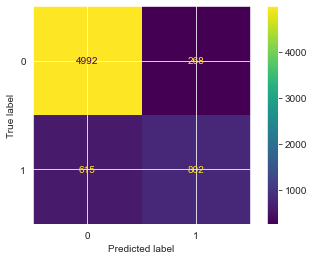

In [149]:
plot_confusion_matrix(model1_pipe,x_test,y_test)

In [150]:
print(model1_pipe.score(x_train,y_train))
print(model1_pipe.score(x_test,y_test))

0.8651522715926111
0.867754979781339


In [151]:
def cross_validation_pip(X_train, y_train, estimator, num_split = 10):
    
    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list = []
    score_val_list = []
    
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):
        
        # train and validation splitting 
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        estimator.fit(X_train_fold, y_train_fold)
        
        # now how did we do?
        accuracy_train = estimator.score(X_train_fold, y_train_fold)
        accuracy_val = estimator.score(X_val_fold, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)
    
    return {'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

In [152]:
#cross_validation_pip(x_train, y_train, model1_pipe)

In [153]:
model1_pipe.steps

[('preprocess',
  ColumnTransformer(transformers=[('ordinalpipe',
                                   Pipeline(steps=[('ordimputer',
                                                    SimpleImputer(strategy='most_frequent')),
                                                   ('ordenc',
                                                    OrdinalEncoder(categories=[['18 '
                                                                                '- '
                                                                                '34 '
                                                                                'Years',
                                                                                '35 '
                                                                                '- '
                                                                                '44 '
                                                                                'Years',
                    

In [154]:
def get_auc(model, X, y):
    # get y_prob
#     X_trans = ct.transform(X)
    y_prob = model.predict_proba(X)
    score = roc_auc_score(y, y_prob[:,1])
    return round(score,3)

# let's finetune the logistic regression model

In [155]:
steps =[('preprocess', ct),
                      ('model',
                       LogisticRegression(random_state=42))]
model1b_pipe = Pipeline(steps)

pipe_grid = {'model__penalty': ['l2', 'none'],
             #'model__solver': ['lbfgs'],
             'model__solver': ['newton-cg', 'liblinear', 'sag', 'saga'],
             'model__C': [0.0001, 0.001, 0.01, 0.1, 1,2],  
             'model__max_iter': [1e2, 1e3, 1e4, 1e7]}  

gs_pipe = GridSearchCV(estimator=model1b_pipe, 
                     param_grid=pipe_grid)
                     


In [156]:
model1b_pipe.fit(x_train, y_train)

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

In [157]:
# let's define a new pipeline object 

steps = [('preprocess', ct),
            ('knn',KNeighborsClassifier())]

model2_pipe = Pipeline(steps)



In [158]:
model2_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

In [159]:
y_pred2 = model2_pipe.predict(x_test)

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


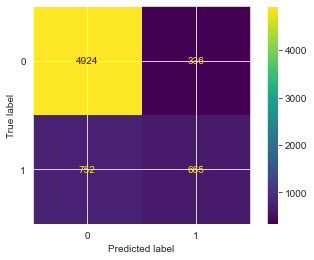

In [160]:
plot_confusion_matrix(model2_pipe,x_test,y_test)

Accuracy is :83.70525685187958

AUC is :0.7

Confusion Matrix
----------------


C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


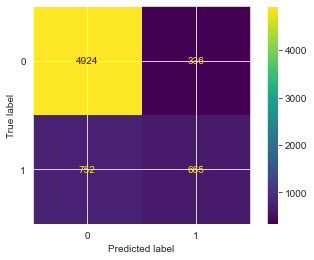

In [161]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred2) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
#pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model2_pipe, x_test, y_test)
plt.show()

In [162]:
print(model2_pipe.score(x_train,y_train))
print(model2_pipe.score(x_test,y_test))

0.8806789815277084
0.8370525685187958


In [163]:
#pipe_grid = {
#             'knn__n_neighbors': [3, 11, 15],
#             'knn__p': [1, 2, 3, 4]}


In [164]:
#gs_pipe = GridSearchCV(estimator=model2_pipe, 
#                     param_grid=pipe_grid)

In [165]:
#gs_pipe.fit(x_train, y_train);

In [166]:
#gs_pipe.best_params_

In [167]:
#gs_pipe.best_score_

In [168]:
#gs_pipe.best_params_


In [169]:
#best_model2 = gs_pipe.best_estimator_

In [170]:
#y_pred = best_model2.predict(x_train)

In [171]:
#plot_confusion_matrix(best_model2,x_test,y_test)

In [172]:
#print(best_model2.score(x_train,y_train))
#print(best_model2.score(x_test,y_test))

Decision Tree and Purning

In [196]:
steps =[('preprocess', ct),
                      ('dt',
                       DecisionTreeClassifier(random_state = 42))]
model3_pipe = Pipeline(steps)


In [197]:
model3_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

In [175]:
y_pred3 = model3_pipe.predict(x_test)

Accuracy is :81.11427287704058

AUC is :0.73

Confusion Matrix
----------------


C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


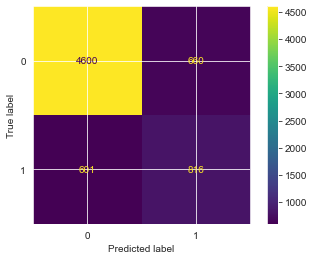

In [176]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred3) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
#pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model3_pipe, x_test, y_test)
plt.show()

In [177]:
print(model3_pipe.score(x_train,y_train))
print(model3_pipe.score(x_test,y_test))

0.9999500748876685
0.8111427287704058


In [211]:
dt_classification_report = classification_report(y_test, y_pred3)
print(dt_classification_report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5260
           1       0.55      0.58      0.56      1417

    accuracy                           0.81      6677
   macro avg       0.72      0.73      0.72      6677
weighted avg       0.81      0.81      0.81      6677



In [201]:
pipe3_grid = {
             'dt__criterion':['gini','entropy'],
             'dt__max_depth': [2,3,7],
             #'dt__min_samples_split': [2,3,5],
             #'dt__min_samples_leaf': [2,3,5]
                 


}

In [202]:
gs_pipe = GridSearchCV(estimator=model3_pipe, 
                       param_grid=pipe3_grid,
                        #cv = 3  
                        
                       )

In [203]:
gs_pipe.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('ordinalpipe',
                                                                         Pipeline(steps=[('ordimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordenc',
                                                                                          OrdinalEncoder(categories=[['18 '
                                                                                                                      '- '
                                                                                                                      '34 '
                                                                                                                      'Years',
                        

# Build and Evaluate a Baseline Model

In [207]:
steps =[('preprocess', ct),
                     ('dt',
                     AdaBoostClassifier(random_state=42))]

model4_pipe = Pipeline(steps)

In [208]:
model4_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinalpipe',
                                                  Pipeline(steps=[('ordimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordenc',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '34 '
                                                                                               'Years',
                                                                                               '35 '
                                                                                               '- '
                              

In [209]:
y_pred4 = model4_pipe.predict(x_test)

In [210]:
adaboost_classification_report = classification_report(y_test, y_pred4)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5260
           1       0.75      0.56      0.64      1417

    accuracy                           0.87      6677
   macro avg       0.82      0.75      0.78      6677
weighted avg       0.86      0.87      0.86      6677



Accuracy is :86.62573011831661

AUC is :0.75

Confusion Matrix
----------------


C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


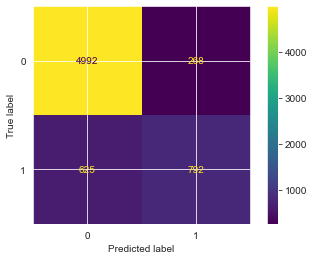

In [212]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred4) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred4)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
#pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model4_pipe, x_test, y_test)
plt.show()

In [ ]:
#accuracy_score

#Using scikit-learn's LogisticRegression model, instantiate a classifier with random_state=42. Then use cross_val_score with scoring="neg_log_loss" to find the average cross-validated log loss for this model on X_train and y_train.

In [ ]:

# Import relevant class and function
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import cross_val_score

# Instantiate a LogisticRegression with random_state=42
#baseline_model = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
#baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")

#baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
#baseline_log_loss

In [ ]:
#for feature in numerical_nan:
    ## We will replace by using median since there are outliers
 #   median_value=df[feature].median()
    
  #  df[feature].fillna(median_value,inplace=True)
    
#df[numerical_nan].isnull().sum()

In [ ]:
# Instantiate the model
#logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
#logreg.fit(X_train, y_train)
#LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   #fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   #max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   #random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   #warm_start=False)